<a href="https://colab.research.google.com/github/pkams/coursera_DataAnalyticsforLSS/blob/master/DataAnalyticsforSixSigma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução

In [0]:
# Import das bibliotecas utilizadas

import random #para gerar números randomicos
import pandas as pd #biblioteca padrão para manipulação de dados
import numpy as np #biblioteca padrão para operações envolvendos arrays
import altair as alt #biblioteca para plotar 
import matplotlib.pyplot as plt #biblioteca para plotar
import seaborn as sns #biblioteca para plotar
import statsmodels #biblioteca para modelos estatisticos
import scipy #biblioteca para calculos gerais

In [0]:
# Random Sampling

ex = list(range(1,5000))
sample = random.sample(ex, 10)
sample

[176, 3983, 4576, 3079, 4441, 2814, 2785, 286, 4759, 268]

In [0]:
### Importando
df = pd.read_excel('dataset.xlsx',sheet_name='Investigation time', skiprows=11)

In [0]:
df.head()

,Case number,Sender-id,Type,Total time,Time open,Time pending,Time closed,Number of pending iterations
0,GR0400250011,BSABESBB,AN,29.73,20.80,8.93,0.0,3
1,GR0400250015,BDCCANCU,OX,6.83,5.54,1.29,0.0,2
2,GR0400250022,CITIUS33,NU,6.86,6.86,0.00,0.0,0
3,GR0400250023,BOFMCAM2,NU,6.93,4.77,2.16,0.0,1
4,GR0400250024,BFICCUHH,OX,19.81,0.28,19.52,0.0,4


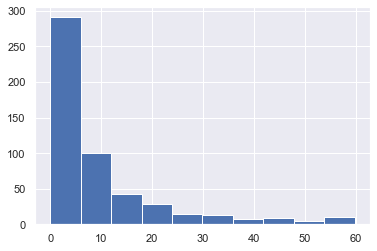

In [0]:
# Histograma Simples

df['Total time'].hist()

In [0]:
# Sample utilizando método do pandas

df['Total time'].sample(10)

273     4.05
476     9.99
149     9.62
423     1.11
488     9.09
330     7.89
346    20.72
389     9.57
205     3.11
17     59.06
Name: Total time, dtype: float64

In [0]:
# Estatistica Descritiva Geral

df['Total time'].describe()

count    521.000000
mean       9.422342
std       12.660866
min        0.000000
25%        1.040000
50%        4.070000
75%       11.850000
max       59.800000
Name: Total time, dtype: float64

In [0]:
# Importando
df2 = pd.read_excel('dataset.xlsx', sheet_name='Caffeine_batches', skiprows=6)
df2.head()

,Batch nr.,Caffeine%,Unnamed: 2
0,082002-C116,0.092,NaN
1,082002-C122,0.105,NaN
2,082002-C126,0.079,NaN
3,082002-C141,0.118,NaN
4,082002-C147,0.069,NaN


In [0]:
# Verificando colunas
df2.columns

Index(['Batch nr.', 'Caffeine%', 'Unnamed: 2'], dtype='object')

In [0]:
# Retirando coluna com NaN
df2 = df2[['Batch nr.', 'Caffeine%']]

In [0]:
# Conferindo Mudanças
df2.head()

,Batch nr.,Caffeine%
0,082002-C116,0.092
1,082002-C122,0.105
2,082002-C126,0.079
3,082002-C141,0.118
4,082002-C147,0.069


# Estatistica Descritiva

In [0]:
df2.describe()

,Caffeine%
count,40.000000
mean,0.083175
std,0.016361
min,0.044000
25%,0.072750
50%,0.084500
75%,0.094000
max,0.118000


# Visualizando dados numéricos

Text(0, 0.5, 'Frequency')

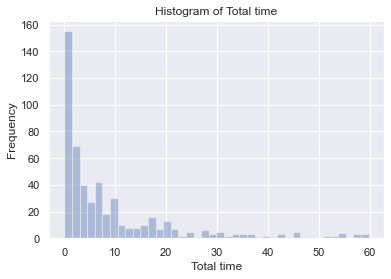

In [0]:
# Histogram e BoxPlot

sns.distplot(df['Total time'],kde=False, bins=40)
plt.title('Histogram of Total time')
plt.xlabel('Total time')
plt.ylabel('Frequency')

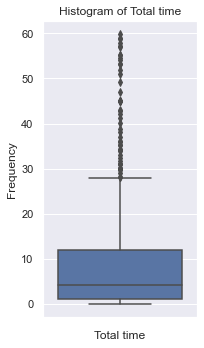

In [0]:
plt.figure(figsize=(3,5))
sns.boxplot(df['Total time'], orient='vertical')
plt.title('Histogram of Total time')
plt.xlabel('Total time')
plt.ylabel('Frequency')
plt.tight_layout()

# Visualizando dados categóricos

In [0]:
# Importando
df3 = pd.read_excel('dataset.xlsx',sheet_name='Reclaims', skiprows=6)
df3

,Reclaim,Person,Processing time
0,Account closing,Jan sr.,24.89
1,IBAN,Marcel,27.36
2,Status info,Marcel,2.65
3,Matching,Margriet,23.48
4,Billing,Kees,35.92
...,...,...,...
117,Status info,Henk,11.76
118,Matching,Jan sr.,28.84
119,Status info,Margriet,32.61
120,Status info,Kees,10.09


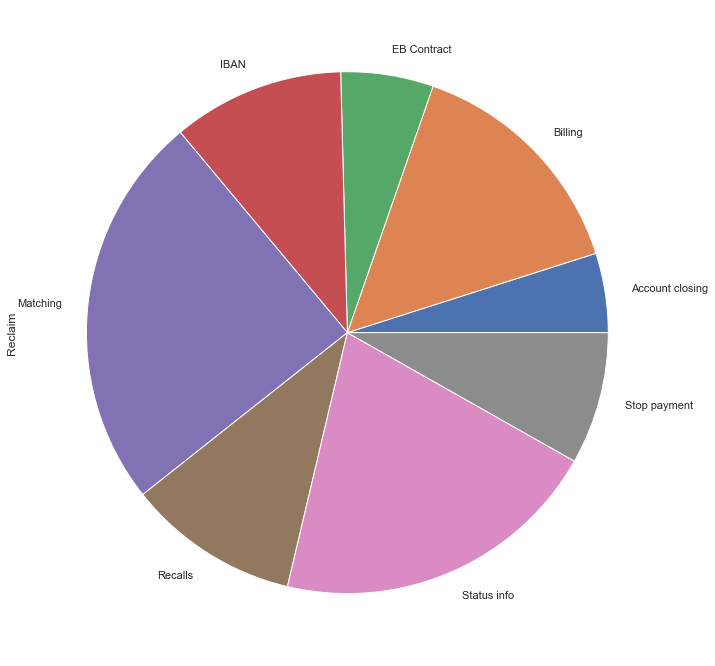

In [0]:
# Gráfico de Pizza
plt.figure(figsize=(12,12))
df3['Reclaim'].value_counts().sort_index().plot.pie()

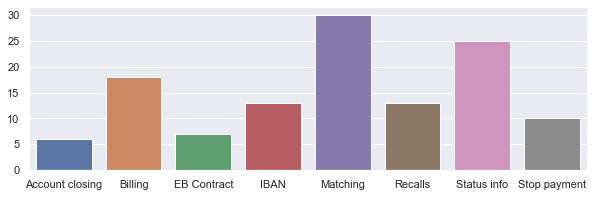

In [0]:
# BarPlot
plt.figure(figsize=(10,3))
sns.barplot(df3['Reclaim'].value_counts().sort_index().index,df3['Reclaim'].value_counts().sort_index().values)

In [0]:
# Tally table
df3['Person'].value_counts().sort_index()
tally_table = pd.DataFrame(df3['Person'].value_counts().sort_index().reset_index())
tally_table.columns = ['Person','Count']
tally_table['Percent'] = 100*tally_table['Count']/(sum(tally_table['Count']))
tally_table

,Person,Count,Percent
0,Henk,17,13.934426
1,Jan jr.,17,13.934426
2,Jan sr.,14,11.475410
3,Karel,15,12.295082
4,Kees,15,12.295082
5,Marcel,22,18.032787
6,Margriet,22,18.032787


# 80/20 - Pareto

In [0]:
df4 = pd.read_excel('dataset.xlsx', sheet_name='Pareto', skiprows=7)
df4

,Stops,Duration,Cause
0,1,30,Deviation in dimensions
1,2,45,Break
2,3,*,Deviation in dimensions
3,4,40,Problem with dough
4,5,55,Break
...,...,...,...
85,86,40,Break
86,87,5,Problem with dough
87,88,40,Break
88,89,44.8,Break


In [0]:
df4_frame = pd.DataFrame(df4['Cause'].value_counts()).reset_index()
df4_frame.columns = ['Count','Duration']
df4_frame['Cumulative %'] = 100 *df4_frame['Duration'].cumsum() / df4_frame['Duration'].sum()
df4_frame

,Count,Duration,Cumulative %
0,Deviation in dimensions,37,41.111111
1,Break,27,71.111111
2,Problem with dough,8,80.000000
3,Biscuits stick to the oven belt,4,84.444444
4,Problem in dough preparation,2,86.666667
5,Oven out of order,2,88.888889
6,Maintenance,2,91.111111
7,Problem with temperature,1,92.222222
8,Problem with stacker belt,1,93.333333
9,Problem with conveyor belt,1,94.444444


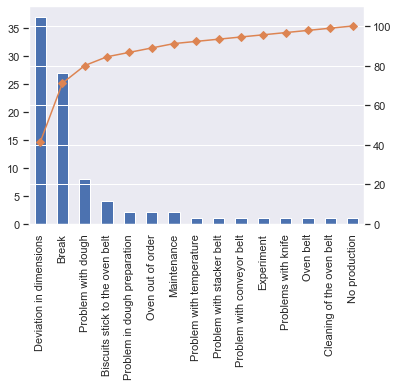

In [0]:
fig, axes = plt.subplots()
ax1 = df4_frame.plot(use_index=True, y='Duration',  kind='bar', ax=axes, legend=False)
plt.xticks(ticks=range(0,len(df4_frame)),labels = list(df4_frame['Count'].values), rotation=90)
ax2 = df4_frame.plot(use_index=True, y='Cumulative %', marker='D', color="C1", kind='line', ax=axes, secondary_y=True, legend=False)
ax2.set_ylim([0,110])
ax1.xaxis.set_tick_params(rotation=90)

# Visualizando relação entre duas váriaveis

<img src="61.png">

## Métodos: 
- Boxplot (X categórico e Y numérico) 
- Scatterplot (X numérico e Y numérico)
- Stacked Bar Chart (X categórico e Y categórico)
- Boxplot agrupado (transposto) (X numérico e Y categórico)

### Relação de X numérico e Y numérico

In [0]:
# Importando
df5 = pd.read_excel('dataset.xlsx', sheet_name='Caffeine-2', skiprows=7)

In [0]:
df5.head()

,Measurement,Caffeine Content,Extraction time
0,1,0.065758,35.515587
1,2,0.058861,38.446456
2,3,0.033810,42.320815
3,4,0.089381,33.280603
4,5,0.067373,36.690363


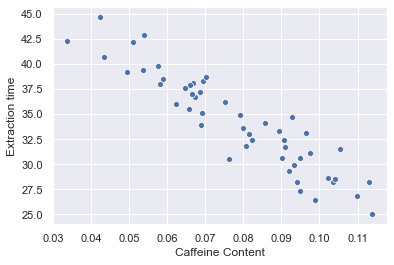

In [0]:
sns.scatterplot(df5['Caffeine Content'], df5['Extraction time'])

### Relação de X categórico e Y numérico

In [0]:
# Importando
df6 = pd.read_excel('dataset.xlsx', sheet_name='Caffeine-3', skiprows=7)
df6.head()

,Caffeine%,Extractor nr.,Batch nr.
0,0.053180,1,718
1,0.056994,2,718
2,0.112809,3,718
3,0.052463,1,718
4,0.083227,2,718


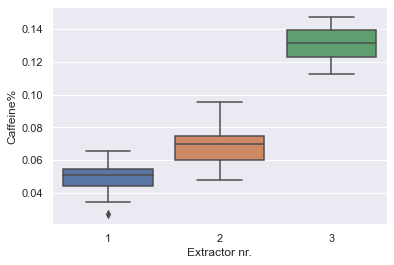

In [0]:
sns.boxplot(y=df6['Caffeine%'], x=df6['Extractor nr.'])

### Relação de X numérico e Y categórico

In [0]:
# Y Categórico
# X Numérico

df7 = pd.read_excel('dataset.xlsx', sheet_name='Student', skiprows=6)
df7.head()

,Student,Math grade,Pass?
0,1,7,No
1,2,7,Yes
2,3,*,No
3,4,8,No
4,5,8,Yes


In [0]:
df7['Math grade'] = pd.to_numeric(df7['Math grade'],errors='coerce')
df7 = df7.dropna()
df7['Math grade'] = df7['Math grade'].astype(int)

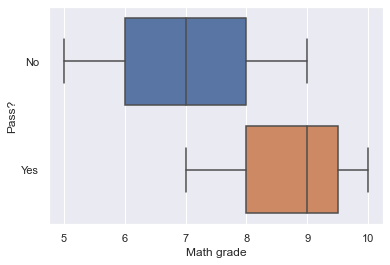

In [0]:
sns.boxplot(x=df7['Math grade'], y=df7['Pass?'])

### Relação de X categórico e Y categórico

In [0]:
df8 = pd.read_excel('dataset.xlsx', sheet_name='Hospital', skiprows=7)
df8.head()

,Patient,Specialist,Department
0,1,P,A1
1,2,P,A1
2,3,Q,A1
3,4,R,A1
4,5,Q,A1


In [0]:
# Contagem de cada agrupamento
df_agg = df8.groupby(['Specialist','Department']).agg('count').reset_index()
df_agg.head()

,Specialist,Department,Patient
0,P,A1,81
1,P,A4,17
2,Q,A1,52
3,Q,A4,15
4,R,A1,78


In [0]:
# Observando apenas uma classe
df_agg[df_agg['Department']=='A1']

,Specialist,Department,Patient
0,P,A1,81
2,Q,A1,52
4,R,A1,78


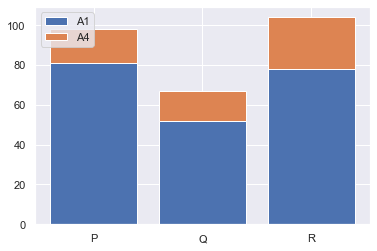

In [0]:
# Barplot stackado
plt.bar(df_agg[df_agg['Department']=='A1']['Specialist'],df_agg[df_agg['Department']=='A1']['Patient'], label='A1')
plt.bar(df_agg[df_agg['Department']=='A4']['Specialist'],df_agg[df_agg['Department']=='A4']['Patient'], label='A4', bottom=df_agg[df_agg['Department']=='A1']['Patient'])
plt.legend(loc='upper left')

In [0]:
### Exercicio 1 ###

df9 = pd.read_excel('dataset.xlsx', sheet_name='Investigation time', skiprows=11)
df9.head()

,Case number,Sender-id,Type,Total time,Time open,Time pending,Time closed,Number of pending iterations
0,GR0400250011,BSABESBB,AN,29.73,20.80,8.93,0.0,3
1,GR0400250015,BDCCANCU,OX,6.83,5.54,1.29,0.0,2
2,GR0400250022,CITIUS33,NU,6.86,6.86,0.00,0.0,0
3,GR0400250023,BOFMCAM2,NU,6.93,4.77,2.16,0.0,1
4,GR0400250024,BFICCUHH,OX,19.81,0.28,19.52,0.0,4


In [0]:
# Qual a média e desvio padrão do total time?
# Use Quartis para estimar a quantidade de reclamações que são lidadas em 15 dias
# A distribuição do total time é simétrica?
# Qual tipo de reclamação é mas comum?

In [0]:
print('Média: ', df9['Total time'].mean())
print('Desvio Padrão: ', df9['Total time'].std())

Média:  9.422341650671784
Desvio Padrão:  12.660865593751883


In [0]:
df9['Total time'].describe() 
# 15 está acima do terceiro quartil, acima de 75%, podemos preduzir algo em torno dos 80%

count    521.000000
mean       9.422342
std       12.660866
min        0.000000
25%        1.040000
50%        4.070000
75%       11.850000
max       59.800000
Name: Total time, dtype: float64

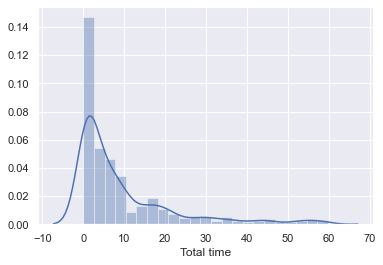

In [0]:
sns.distplot(df9['Total time'])

In [0]:
df9['Type'].value_counts()[0]

# Reclamação do tipo mais comum

157

In [0]:
### Exercicio 2 ###

# Batch influencia na porcentagem de café?

df6.head()

,Caffeine%,Extractor nr.,Batch nr.
0,0.053180,1,718
1,0.056994,2,718
2,0.112809,3,718
3,0.052463,1,718
4,0.083227,2,718


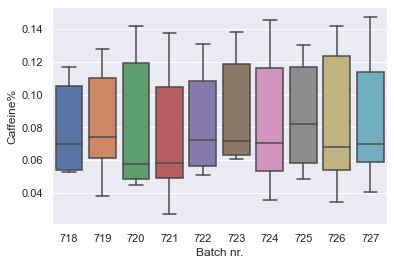

In [0]:
#Boxplot
sns.boxplot(x=df6['Batch nr.'], y=df6['Caffeine%'])

# Resumo Estatistico e Análise de Distribuição

In [0]:
##### Resumo estatistico da distribução:

In [0]:
df10 = pd.read_excel('dataset.xlsx', sheet_name='Caffeine_batches', skiprows=6)
df10 = df10.drop('Unnamed: 2', axis=1)
df10.head()

,Batch nr.,Caffeine%
0,082002-C116,0.092
1,082002-C122,0.105
2,082002-C126,0.079
3,082002-C141,0.118
4,082002-C147,0.069


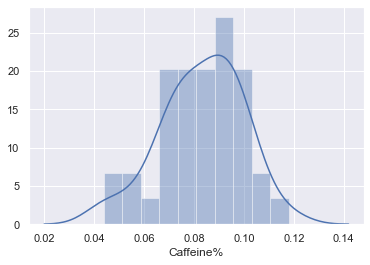

In [0]:
sns.distplot(df10['Caffeine%'], bins=10)

In [0]:
print('Média: ', df10['Caffeine%'].mean())
print('Desvio padrão: ', df10['Caffeine%'].std()) 
print('Mediana: ', df10['Caffeine%'].median())

Média:  0.08317499999999999
Desvio padrão:  0.016361128887137904
Mediana:  0.0845


In [0]:
df10['Caffeine%'].describe()

count    40.000000
mean      0.083175
std       0.016361
min       0.044000
25%       0.072750
50%       0.084500
75%       0.094000
max       0.118000
Name: Caffeine%, dtype: float64

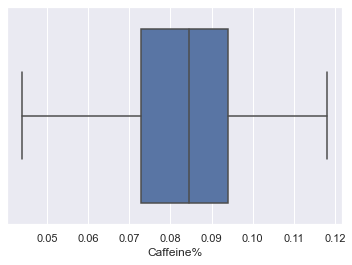

In [0]:
sns.boxplot(df10['Caffeine%'])

In [0]:
# Intervalo de confiança para a média
scipy.stats.norm.interval(0.95, loc=df10['Caffeine%'].mean(), scale=df10['Caffeine%'].std()/np.sqrt(len(df10['Caffeine%'])))

(0.07810472679642862, 0.08824527320357135)

In [0]:
# Utilizando fórmula para achar limites 'na mão'
# Xbarra +- (1.96 * EP)
# Xbarra = valor média
# EP = Erro padrão = Std/(sqrt(quantidadedeamostras))

print('Limite Superior: ', df10['Caffeine%'].mean() + (1.96 * df10['Caffeine%'].std()/np.sqrt(len(df10['Caffeine%']))))
print('Limite Inferior: ', df10['Caffeine%'].mean() - (1.96 * df10['Caffeine%'].std()/np.sqrt(len(df10['Caffeine%']))))

Limite Superior:  0.0882453663727433
Limite Inferior:  0.07810463362725667


In [0]:
# Usando fórmula encontrada para CI da Mediana:
# Limite Inferior para Mediana
n = len(df10['Caffeine%'])

LI = n/2 - (1.96*np.sqrt(n))/2
LI = int(round(LI,1))
df10['Caffeine%'].sort_values().iloc[LI]

0.077

In [0]:
# Limite Superior para Mediana
LS = 1 + n/2 + (1.96*np.sqrt(n))/2
LS = int(round(LS,1))
df10['Caffeine%'].sort_values().iloc[LS]

0.093

In [0]:
### Outros tipos de Distribuição ###

In [0]:
df11 = pd.read_excel('dataset.xlsx', sheet_name='THT', skiprows=8)
df11['THT '].head()

0    332
1    778
2    361
3    794
4    231
Name: THT , dtype: int64

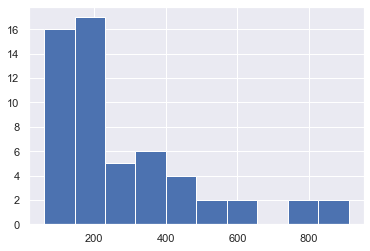

In [0]:
df11['THT '].hist()

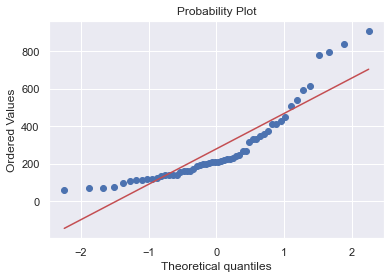

In [0]:
scipy.stats.probplot(df11['THT '], plot=plt)
plt.show()

In [0]:
kslog = scipy.stats.kstest(df11['THT '], "lognorm", scipy.stats.lognorm.fit(df11['THT '], floc=0))

In [0]:
ksnorm = scipy.stats.kstest(df11['THT '], "norm", scipy.stats.norm.fit(df11['THT ']))


In [0]:
ksweib = scipy.stats.kstest(df11['THT '], "weibull_min", scipy.stats.weibull_min.fit(df11['THT '], floc=0))


In [0]:
print('KS Test para distribuição normal: ', ksnorm)
print('KS Test para distribuição lognormal: ', kslog)
print('KS Test para distribuição Weibull: ', ksweib)

KS Test para distribuição normal:  KstestResult(statistic=0.21053947711618937, pvalue=0.011756056715293875)
KS Test para distribuição lognormal:  KstestResult(statistic=0.0925393972774392, pvalue=0.7220175781315007)
KS Test para distribuição Weibull:  KstestResult(statistic=0.1462842869642882, pvalue=0.16473247641492067)


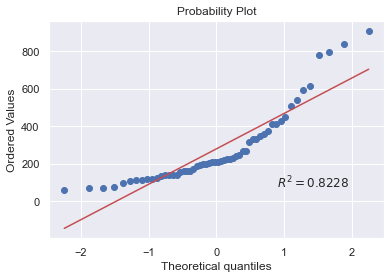

In [0]:
# Probability Plot Curva Normal

norm = scipy.stats.probplot(df11['THT '], dist='norm', plot=plt, rvalue=True)
plt.show()

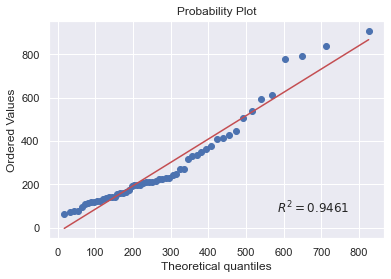

In [0]:
# Probability Plot Curva Weibull

weib = scipy.stats.probplot(df11['THT '], sparams=scipy.stats.weibull_min.fit(df11['THT '], floc=0),dist='weibull_min', plot=plt, rvalue=True)
plt.show()

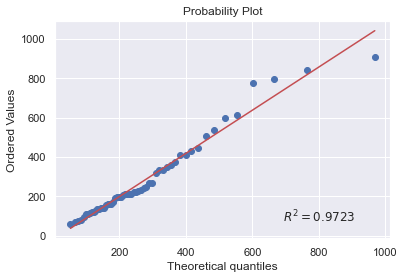

In [0]:
# Probability Plot Curva LogNormal

log = scipy.stats.probplot(df11['THT '], sparams=scipy.stats.lognorm.fit(df11['THT '], floc=0),dist='lognorm', plot=plt, rvalue=True)
plt.show()

In [0]:
# Qual obteve melhor resultado de p-valor?

resultados = pd.DataFrame({'Distribuição':['Normal','Logistic','Weibull'], 'P-Valor':[ksnorm[1],kslog[1],ksweib[1]],'R²':[norm[1][2]**2,log[1][2]**2,weib[1][2]**2]})
color = ((resultados['P-Valor'] == resultados['P-Valor'].max())).map({True: 'background-color: yellow', False: ''})
resultados.style.apply(lambda s: color)

,Distribuição,P-Valor,R²
0,Normal,0.011756,0.822790
1,Logistic,0.722018,0.972288
2,Weibull,0.164732,0.946054


P(x<240): 0.607


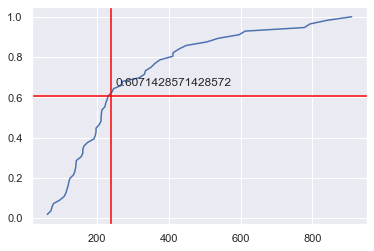

In [0]:
# ECDF (Empirical Distribution Function)

from statsmodels.distributions.empirical_distribution import ECDF
from matplotlib import pyplot

ecdf = ECDF(df11['THT '])
# Observando resultado para um X = 240 por exemplo:
print('P(x<240): %.3f' % ecdf(240))

pyplot.plot(ecdf.x, ecdf.y)
plt.axvline(240, color='red')
plt.axhline(ecdf(240), color='red')
plt.text(240+10, ecdf(240)+0.05, s=str(ecdf(240)))
pyplot.show()

In [0]:
# Exercicio 

df12 = pd.read_excel('dataset.xlsx', sheet_name='Length of stay', skiprows=5,usecols=['Length of stay '])
df12.head()

,Length of stay
0,8
1,11
2,6
3,11
4,14


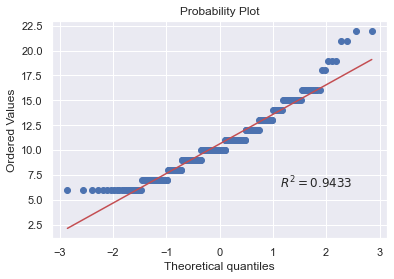

In [0]:
# Probability Plot Curva Normal
norm = scipy.stats.probplot(df12.iloc[:,0], dist='norm', plot=plt, rvalue=True)
plt.show()

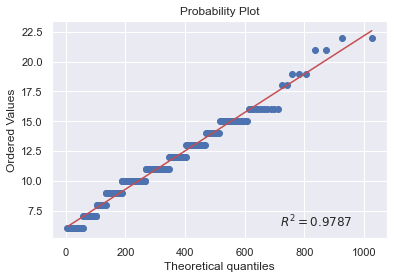

In [0]:
# Probability Plot Curva Weibull

weib = scipy.stats.probplot(df12.iloc[:,0], sparams=scipy.stats.weibull_min.fit(df11['THT '], floc=0),dist='weibull_min', plot=plt, rvalue=True)
plt.show()

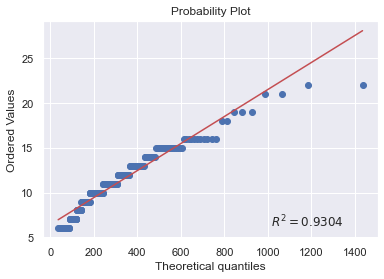

In [0]:
# Probability Plot Curva LogNormal

log = scipy.stats.probplot(df12.iloc[:,0], sparams=scipy.stats.lognorm.fit(df11['THT '], floc=0),dist='lognorm', plot=plt, rvalue=True)
plt.show()

In [0]:
kslog = scipy.stats.kstest(df11['THT '], "lognorm", scipy.stats.lognorm.fit(df11['THT '], floc=0))
ksnorm = scipy.stats.kstest(df11['THT '], "norm", scipy.stats.norm.fit(df11['THT ']))
ksweib = scipy.stats.kstest(df11['THT '], "weibull_min", scipy.stats.weibull_min.fit(df11['THT '], floc=0))

In [0]:
resultados = pd.DataFrame({'Distribuição':['Normal','Logistic','Weibull'], 'P-Valor':[ksnorm[1],kslog[1],ksweib[1]],'R²':[norm[1][2]**2,log[1][2]**2,weib[1][2]**2]})
color = ((resultados['P-Valor'] == resultados['P-Valor'].max())).map({True: 'background-color: yellow', False: ''})
resultados.style.apply(lambda s: color)

,Distribuição,P-Valor,R²
0,Normal,0.011756,0.943343
1,Logistic,0.722018,0.930378
2,Weibull,0.164732,0.978687


# Análise de Relação de Váriaveis e Testes Estatísticos

## Métodos: 
- ANOVA / 2-sample t-test / Kruskall-Wallis (X categórico e Y numérico) 
- Regressão (X numérico e Y numérico)
- Qui-Quadrado (X categórico e Y categórico)
- Regressão Logística (X numérico e Y categórico)

### ANOVA (X categórico e Y numérico)

In [0]:
df13 = pd.read_excel('dataset.xlsx', sheet_name='Moisture', skiprows=6)
df13.head()

,Machine 1,Machine 2,Machine 3,Machine 4
0,11.37,9.43,11.27,8.80
1,11.31,9.62,8.47,9.58
2,10.93,6.61,11.86,12.26
3,13.77,9.31,8.77,10.00
4,14.45,14.08,8.44,8.84


In [0]:
df_mos = pd.melt(df13, value_vars=df13.columns,var_name='Maquina',value_name='Moisture')
df_mos.head()

,Maquina,Moisture
0,Machine 1,11.37
1,Machine 1,11.31
2,Machine 1,10.93
3,Machine 1,13.77
4,Machine 1,14.45


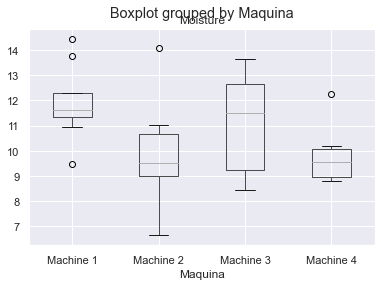

In [0]:
# Método 1 do boxplot
df_mos.boxplot(column='Moisture', by='Maquina')

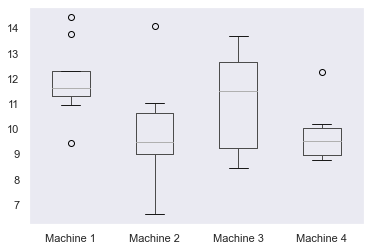

In [0]:
# Método 2 do boxplot
df13.boxplot(column=['Machine 1', 'Machine 2', 'Machine 3', 'Machine 4'], grid=False)

In [0]:
# Método 1 (apenas f-valor e p-valor)
fvalue, pvalue = scipy.stats.f_oneway(df13['Machine 1'],df13['Machine 2'],df13['Machine 3'],df13['Machine 4'])
print(fvalue, pvalue)

4.239546816472052 0.011526002205569303


In [0]:
# Método 2
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Reshaping
d_melt= pd.melt(df13, value_vars=['Machine 1','Machine 2','Machine 3','Machine 4'])
# Trocando nome das colunas
d_melt.columns = ['Maquina', 'Mistura']
# OLS Model (Ordinary Least Squares)
model = ols('Mistura ~C(Maquina)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Maquina),36.01064,3.0,4.239547,0.011526
Residual,101.92780,36.0,NaN,NaN


In [0]:
# P valor abaixo de 0.05, a diferença é signficante.

In [0]:
# Para verificar a diferença entre cada par podemos usar pairwise_tukeyhsd

from statsmodels.stats.multicomp import pairwise_tukeyhsd
m_comp = pairwise_tukeyhsd(endog=d_melt['Mistura'], groups=d_melt['Maquina'], alpha=0.05)
print(m_comp)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
Machine 1 Machine 2   -2.258  0.024 -4.2847 -0.2313   True
Machine 1 Machine 3   -0.838  0.665 -2.8647  1.1887  False
Machine 1 Machine 4   -2.184 0.0306 -4.2107 -0.1573   True
Machine 2 Machine 3     1.42 0.2515 -0.6067  3.4467  False
Machine 2 Machine 4    0.074    0.9 -1.9527  2.1007  False
Machine 3 Machine 4   -1.346 0.2954 -3.3727  0.6807  False
----------------------------------------------------------


In [0]:
# Shapiro_Wilk test para residuos
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

# P-valor > 0.05, falhamos em rejeitar a hipotese nula, ou seja, dados são normais

0.9597582221031189 0.16433896124362946


In [0]:
# Caso normalidade não seja constada usamos Kruskal Willis análise
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html

In [0]:
df14 = pd.read_excel('dataset.xlsx', sheet_name='THT', skiprows=8, usecols=['THT ', 'Training'])
df14.head()

,THT,Training
0,332,No
1,778,No
2,361,No
3,794,No
4,231,No


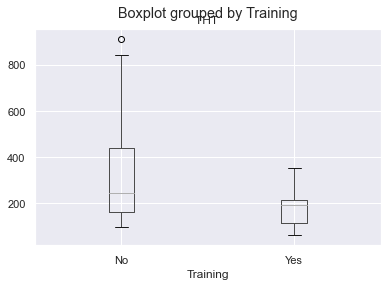

In [0]:
df14.boxplot(column='THT ', by='Training')

In [0]:
df_piv = pd.pivot(df14,columns='Training', values='THT ')
df_piv.head()

Training,No,Yes
0,332.0,NaN
1,778.0,NaN
2,361.0,NaN
3,794.0,NaN
4,231.0,NaN


In [0]:
df_no = df_piv['No'].dropna().reset_index(drop=True)
df_yes = df_piv['Yes'].dropna().reset_index(drop=True)

In [0]:
# Método 1 (apenas f valor e p-valor)
fvalue, pvalue = stats.f_oneway(df_no, df_yes)
print(fvalue, pvalue)

11.35090466011139 0.001397509858417404


In [0]:
# Método 2
import statsmodels.api as sm
from statsmodels.formula.api import ols

# OLS Model (Ordinary Least Squares)
df14.columns= ['THT','Training']
model = ols('THT ~C(Training)', data=df14).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

# Shapiro_Wilk test para residuos
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

# P-valor > 0.05, falhamos em rejeitar a hipotese nula, ou seja, dados são normais

0.8984990119934082 0.00019384559709578753


In [0]:
# Dados não normais, vamos para teste de Kruskall
print(stats.kruskal(df_no, df_yes))

# P-Valor < 0.05, a diferença é estatisticamente significante
# Grupos são consideravelmente DIFERENTES

print(df_no.median(), df_yes.median())

KruskalResult(statistic=10.124978840319288, pvalue=0.0014627333789109824)
246.0 191.0


In [0]:
### Two Sample T-Test ###

df15 = pd.read_excel('dataset.xlsx', sheet_name='Fertilizer', skiprows=6, usecols=['Fertilizer A', 'Fertilizer B'])
df15.head()

,Fertilizer A,Fertilizer B
0,7.8,10.9
1,5.1,4.3
2,5.7,9.1
3,2.3,5.2
4,2.9,6.2


In [0]:
scipy.stats.ttest_ind(df15.iloc[:,0],df15.iloc[:,1])

Ttest_indResult(statistic=-2.707054108458026, pvalue=0.014433730873512355)

In [0]:
# P-Valor < 0.05, Aceitamos h0 de que ambas as variaveis são diferentes
# Escolhemos a com maior média neste caso

In [0]:
scipy.stats.levene(df13['Machine 1'], df13['Machine 2'],df13['Machine 3'],df13['Machine 4'])

LeveneResult(statistic=1.1953333816795477, pvalue=0.3253302258207216)

In [0]:
df13['Machine 1'].std(), df13['Machine 2'].std(), df13['Machine 3'].std(),df13['Machine 4'].std()

(1.4169376211471774, 2.1098880960320567, 1.948168655715185, 1.0347028558963196)

In [0]:
# P-Valor > 0.05, não podemos provar que há diferença na variação das
# amostras.

In [0]:
### Exercicio 1

### Variavel X (Categorica) -> Variavel Y (Numérica)

In [0]:
df16 = pd.read_excel('dataset.xlsx', sheet_name='Productivity', skiprows=6)
df16.head()

,Shift 1,Shift 2,Shift 3
0,348,348,352
1,319,293,342
2,336,315,359
3,342,327,350
4,314,326,201


In [0]:
# Método 1 (apenas f valor e p-valor)
fvalue, pvalue = stats.f_oneway(df16['Shift 1'],df16['Shift 2'],df16['Shift 3'])
print(fvalue, pvalue)

# P-Valor > 0.05, as amostras são aproximadas iguais.
# Devemos ver residuo!

0.3509720863499023 0.7049955570970079


In [0]:
df16_melt = pd.melt(df16, value_vars=['Shift 1','Shift 2', 'Shift 3'])
df16_melt.head()

,variable,value
0,Shift 1,348
1,Shift 1,319
2,Shift 1,336
3,Shift 1,342
4,Shift 1,314


In [0]:
# Método 2
import statsmodels.api as sm
from statsmodels.formula.api import ols

# OLS Model (Ordinary Least Squares)
df16_melt.columns= ['Shift','Value']
model = ols('Value ~C(Shift)', data=df16_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

# Shapiro_Wilk test para residuos
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

# P-valor < 0.05, aceitamos hipotese nula, dados NÃO SÃO normais. Usaremos teste para dados não normais!

0.7251772880554199 1.0979924434939559e-11


In [0]:
# Dados não normais, vamos para teste de Kruskall
print(stats.kruskal(df16['Shift 1'], df16['Shift 2'], df16['Shift 3']))

# P-Valor < 0.05, a diferença é estatisticamente significante
# Grupos são consideravelmente DIFERENTES

print(df16['Shift 1'].median(), df16['Shift 2'].median(), df16['Shift 3'].median())

KruskalResult(statistic=10.648326880303141, pvalue=0.004872425385206297)
315.0 323.5 335.0


In [0]:
# P-Valor < 0.05, as medianas não são iguais! As amostras não são iguais! as produtividades diferem de turno para turno!

In [0]:
### Exercicio 2 ###
# Categorical X, Numerical Y

In [0]:
df17 = pd.read_excel('dataset.xlsx', sheet_name='Departments', skiprows=6, usecols = ['Department', 'Throughput times'])
df17.head()

,Department,Throughput times
0,A,4.21
1,A,0.19
2,C,9.88
3,A,5.11
4,C,15.99


In [0]:
# Método 2
import statsmodels.api as sm
from statsmodels.formula.api import ols

# OLS Model (Ordinary Least Squares)
df17.columns = ['Dep','Times']
model = ols('Times ~C(Dep)', data=df17).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# Shapiro_Wilk test para residuos
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print('')
print(w, pvalue)

# P-valor < 0.05, aceitamos hipotese nula, dados NÃO SÃO normais. Usaremos teste para dados não normais!

                sum_sq     df         F    PR(>F)
C(Dep)     4726.179339    2.0  9.224293  0.000127
Residual  83258.859461  325.0       NaN       NaN

0.6572904586791992 3.4694691792108686e-25


In [0]:
# Anova garantiu que as médias são iguais, vejamos o teste de residuos.

# P-Valor < 0.05, Dados não são normais, prosseguimos para próximo teste!

In [0]:
df17_piv = pd.pivot(columns='Dep', data=df17)
df17_piv.columns = ['A','B','C']
df_A = df17_piv['A'].dropna().reset_index(drop=True)
df_B = df17_piv['B'].dropna().reset_index(drop=True)
df_C = df17_piv['C'].dropna().reset_index(drop=True)


In [0]:
# Dados não normais, vamos para teste de Kruskall
print(stats.kruskal(df_A, df_B, df_C))

# P-Valor < 0.05, a diferença é estatisticamente significante
# Grupos são consideravelmente DIFERENTES

print(df_A.median(), df_B.median(), df_C.median())

KruskalResult(statistic=30.220698472785777, pvalue=2.7394205352955823e-07)
11.52 9.895 15.47


### Regressão (X e Y Numéricos)

In [0]:
df18 = pd.read_excel('dataset.xlsx', sheet_name='Tea bags', skiprows=7)
df18.head()

,Day,Bags,Stops
0,1,16,5
1,2,21,8
2,3,15,4
3,4,20,6
4,5,20,8


In [0]:
import pingouin as pg
lm = pg.linear_regression(df18['Stops'], df18['Bags'])
lm

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,6.305769,0.930691,6.775362,6.548818e-07,0.889903,0.885116,4.380488,8.231050
1,Stops,1.944231,0.142594,13.634747,1.659539e-12,0.889903,0.885116,1.649253,2.239209


In [0]:
# P < 0.05, H1 pode ser aceita, existe relação entre as variaveis!

In [0]:
print('A equação que explica a relação é: Y = ', lm.coef[0], ' +', lm.coef[1], '*X')

A equação que explica a relação é: Y =  6.305769230769234  + 1.9442307692307683 *X


In [0]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(df18['Stops'].values.reshape(-1,1), df18['Bags'].values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
ypred = linreg.predict(df18['Stops'].values.reshape(-1,1))

residuo = df18['Bags'].values.reshape(-1,1) - ypred

residuo

array([[-0.02692308],
       [-0.85961538],
       [ 0.91730769],
       [ 2.02884615],
       [-1.85961538],
       [-3.02692308],
       [ 2.08461538],
       [ 1.08461538],
       [-1.91538462],
       [ 1.19615385],
       [ 0.02884615],
       [ 0.02884615],
       [ 0.86153846],
       [ 2.19615385],
       [-0.80384615],
       [-0.30576923],
       [-1.08269231],
       [ 1.08461538],
       [-1.91538462],
       [-0.85961538],
       [ 0.02884615],
       [-0.97115385],
       [ 1.91730769],
       [-0.91538462],
       [ 1.08461538]])

In [0]:
residuo_df = pd.DataFrame(residuo)
residuo_df.columns = ['Residuo']
residuo_df['Valor Real'] = df18['Stops']
residuo_df['Valor Previsto'] = ypred
residuo_df.head()

,Residuo,Valor Real,Valor Previsto
0,-0.026923,5,16.026923
1,-0.859615,8,21.859615
2,0.917308,4,14.082692
3,2.028846,6,17.971154
4,-1.859615,8,21.859615


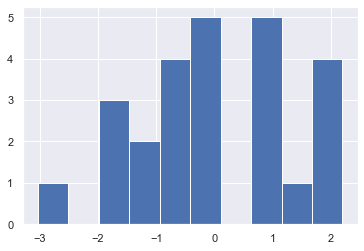

In [0]:
# Histograma

residuo_df['Residuo'].hist()

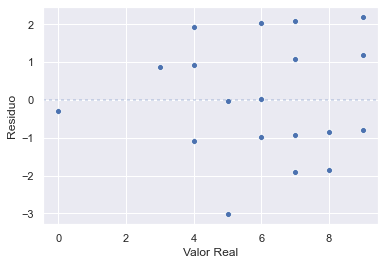

In [0]:
# Versus Fit

sns.scatterplot(residuo_df.iloc[:,1], residuo_df.iloc[:,0])
plt.axhline(0, alpha=0.3, dashes=(2.0, 2.0))

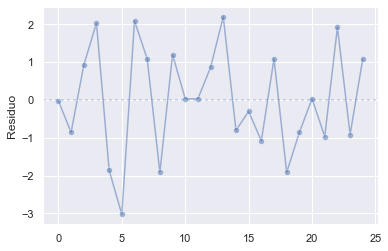

In [0]:
# Versus Order

sns.lineplot(range(len(residuo_df)), residuo_df.iloc[:,0], marker='o', alpha=0.5)
plt.axhline(0, alpha=0.3, dashes=(2.0, 2.0))

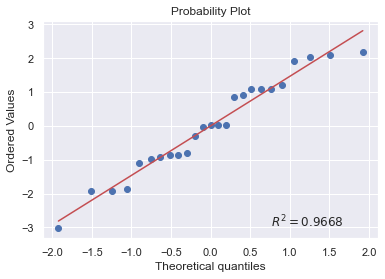

In [0]:
scipy.stats.probplot(residuo_df['Residuo'], plot=plt, rvalue=True)
plt.show()

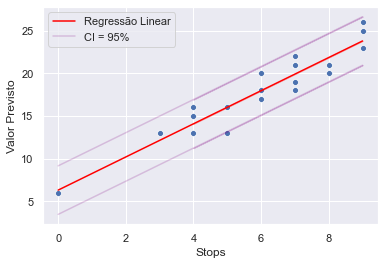

In [0]:
sns.set()
sns.scatterplot(df18['Stops'], df18['Bags'])
sns.lineplot(df18['Stops'],residuo_df['Valor Previsto'], color='Red', label='Regressão Linear')

twosd_resid = 2*residuo_df['Residuo'].std()

sns.lineplot(df18['Stops'],residuo_df['Valor Previsto']+twosd_resid, color='Purple',alpha=0.2, label='CI = 95%')
sns.lineplot(df18['Stops'],residuo_df['Valor Previsto']-twosd_resid, color='Purple',alpha=0.2)

plt.legend()

In [0]:
residuo_df['+2S'] = residuo_df['Valor Previsto']+twosd_resid
residuo_df['-2S'] = residuo_df['Valor Previsto']-twosd_resid
residuo_df.columns
residuo_df[['Valor Real', 'Valor Previsto','Residuo', '+2S', '-2S']].head()

,Valor Real,Valor Previsto,Residuo,+2S,-2S
0,5,16.026923,-0.026923,18.874043,13.179804
1,8,21.859615,-0.859615,24.706735,19.012496
2,4,14.082692,0.917308,16.929812,11.235573
3,6,17.971154,2.028846,20.818273,15.124034
4,8,21.859615,-1.859615,24.706735,19.012496


In [0]:
# 95% estão dentro das duas linhas.
# Abaixo da linha superior temos 97.5%
# Para termos menos de 15 defeitos por dia usamos o valor de 15 em que cruza a linha superior
# Temos aproximadamente ~3
# Com 3 paradas temos em 97.5% dos dias menos de 15 defeitos

# Podemos calcular pelo standard deviation também:

valor = linreg.intercept_ + linreg.coef_*(3) # 3 paradas
valor

array([[12.13846154]])

In [0]:
print('95% dos valores de 3 paradas estão entre: ', valor - 2*residuo_df['Residuo'].std(), ' e ', valor + 2*residuo_df['Residuo'].std())
print('Em 97.5% dos casos produzimos com 3 menos de ', valor + 2*residuo_df['Residuo'].std())

95% dos valores de 3 paradas estão entre:  [[9.29134199]]  e  [[14.98558109]]
Em 97.5% dos casos produzimos com 3 menos de  [[14.98558109]]


### Regressão Quadrática

In [0]:
# Quadratic Regression
df19 = pd.read_excel('dataset.xlsx', sheet_name='Caffeine', skiprows=6, usecols=['Caf%', 'Extr'])
df19.head()

,Caf%,Extr
0,0.259,1
1,0.241,2
2,0.145,3
3,0.179,3
4,0.162,3


In [0]:
import pingouin as pg
# Using a Pandas DataFrame `df`:
lm = pg.linear_regression(df19['Extr'], df19['Caf%'])
lm

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.200295,0.011769,17.018209,1.580403e-14,0.768546,0.758482,0.175948,0.224642
1,Extr,-0.011309,0.001294,-8.739084,9.115531e-09,0.768546,0.758482,-0.013986,-0.008632


In [0]:
linreg = LinearRegression()
linreg.fit(df19['Extr'].values.reshape(-1,1), df19['Caf%'].values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
df19['ResiduoRegressao'] = df19[['Caf%']] - linreg.predict(df19['Extr'].values.reshape(-1,1))
df19.head()

,Caf%,Extr,ResiduoRegressao
0,0.259,1,0.070013
1,0.241,2,0.063322
2,0.145,3,-0.021369
3,0.179,3,0.012631
4,0.162,3,-0.004369


Text(0.5, 1.0, 'Versus Plot')

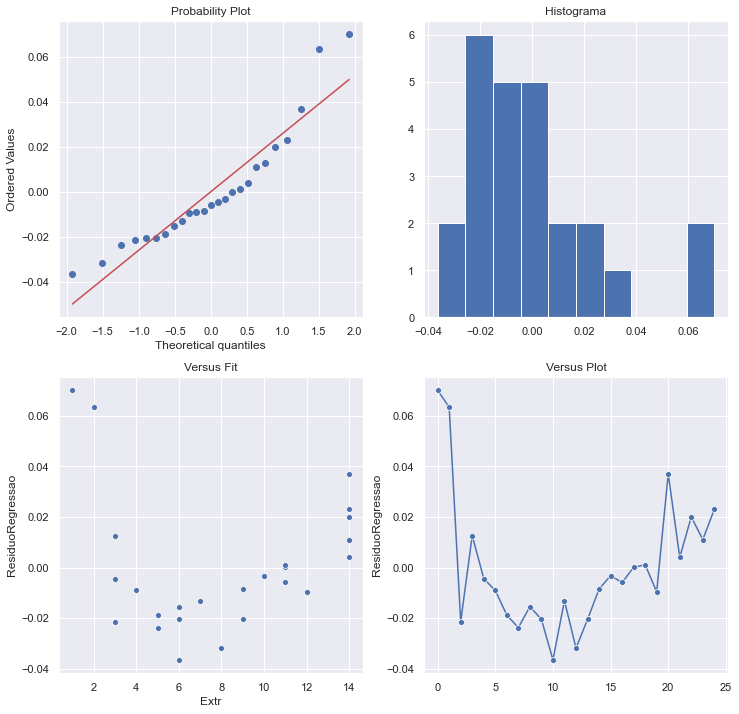

In [0]:
plt.figure(figsize=(12,12))
plt.subplot(2, 2, 1)
scipy.stats.probplot(df19['ResiduoRegressao'], plot=plt)
plt.title('Probability Plot')
plt.subplot(2, 2, 2)
df19['ResiduoRegressao'].hist()
plt.title('Histograma')
plt.subplot(2, 2, 3)
sns.scatterplot(df19['Extr'], df19['ResiduoRegressao'])
plt.title('Versus Fit')
plt.subplot(2,2,4)
sns.lineplot(range(len(df19)),df19['ResiduoRegressao'], marker='o')
plt.title('Versus Plot')

In [0]:
# Polynomial Features

from sklearn.preprocessing import PolynomialFeatures

poly_feat = pd.DataFrame()

poly = PolynomialFeatures(2)

poly_feat = poly.fit_transform(df19['Extr'].values.reshape(-1,1))
# Features Polinomiais

In [0]:
lm = pg.linear_regression(poly_feat, df19['Caf%'])
lm

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.270339,0.012779,21.155162,4.107451e-16,0.921595,0.914467,0.243837,0.296841
1,x2,-0.034659,0.003645,-9.507507,3.001385e-09,0.921595,0.914467,-0.042219,-0.027099
2,x3,0.001434,0.000219,6.553214,1.365936e-06,0.921595,0.914467,0.000980,0.001888


In [0]:
linreg = LinearRegression()
linreg.fit(poly_feat, df19['Caf%'].values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
df19['ResiduoRegressaoQuadratica'] = df19[['Caf%']] - linreg.predict(poly_feat)
df19['PrevisaoQuadratica'] = linreg.predict(poly_feat)
df19.head()

,Caf%,Extr,ResiduoRegressao,ResiduoRegressaoQuadratica,PrevisaoQuadratica
0,0.259,1,0.070013,0.021886,0.237114
1,0.241,2,0.063322,0.034243,0.206757
2,0.145,3,-0.021369,-0.034268,0.179268
3,0.179,3,0.012631,-0.000268,0.179268
4,0.162,3,-0.004369,-0.017268,0.179268


In [0]:
ypred = df19['PrevisaoQuadratica']

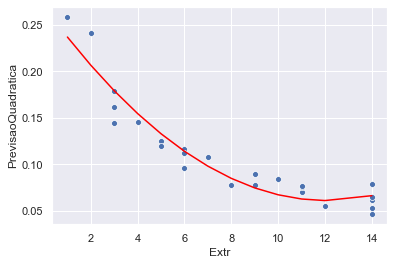

In [0]:
sns.scatterplot(df19['Extr'], df19['Caf%'])
sns.lineplot(df19['Extr'], ypred, color='red')

Text(0.5, 1.0, 'Versus Plot')

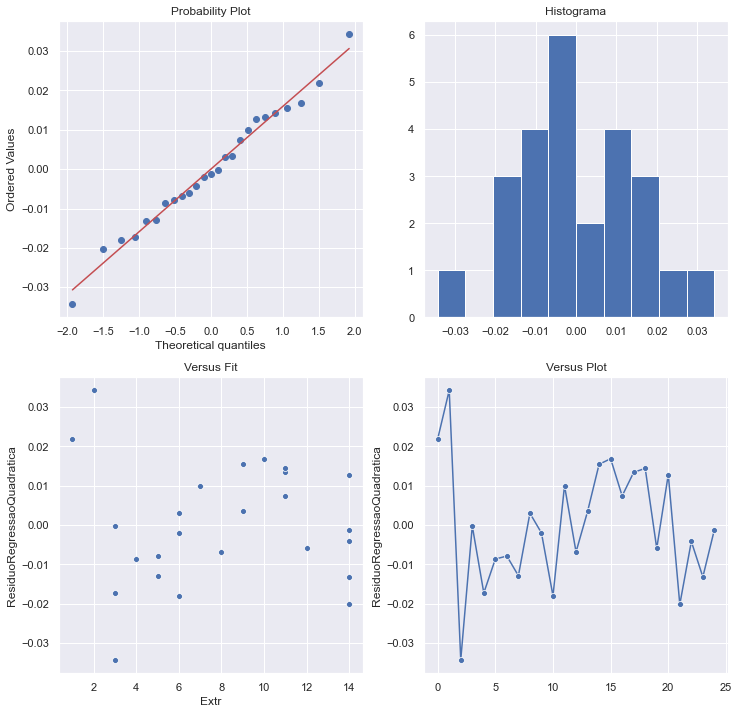

In [0]:
plt.figure(figsize=(12,12))
plt.subplot(2, 2, 1)
scipy.stats.probplot(df19['ResiduoRegressaoQuadratica'], plot=plt)
plt.title('Probability Plot')
plt.subplot(2, 2, 2)
df19['ResiduoRegressaoQuadratica'].hist()
plt.title('Histograma')
plt.subplot(2, 2, 3)
sns.scatterplot(df19['Extr'], df19['ResiduoRegressaoQuadratica'])
plt.title('Versus Fit')
plt.subplot(2,2,4)
sns.lineplot(range(len(df19)),df19['ResiduoRegressaoQuadratica'], marker='o')
plt.title('Versus Plot')

In [0]:
### Exercicio

In [0]:
df20 = pd.read_excel('dataset.xlsx', sheet_name='Picking', skiprows=7)
df20.head()

,Order,Items,Pick-time
0,1,18,11.6
1,2,11,9.5
2,3,7,6.0
3,4,7,4.7
4,5,22,15.0


In [0]:
# Uma ordem deve estar pronta as 16h
# A ordem consiste em 25 items
# Qual horário deve-se começar a produzir (no máximo) (pick time)?

In [0]:
pg.linear_regression(df20['Items'], df20['Pick-time'])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,3.812264,0.618387,6.164849,1.175816e-06,0.831247,0.825221,2.545555,5.078973
1,Items,0.535827,0.045625,11.744078,2.473042e-12,0.831247,0.825221,0.442368,0.629287


In [0]:
linreg.fit(df20['Items'].values.reshape(-1,1), df20['Pick-time'].values.reshape(-1,1))


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
df20['Residuos'] = df20[['Pick-time']] - linreg.predict(df20['Items'].values.reshape(-1,1))

Text(0.5, 1.0, 'Versus Plot')

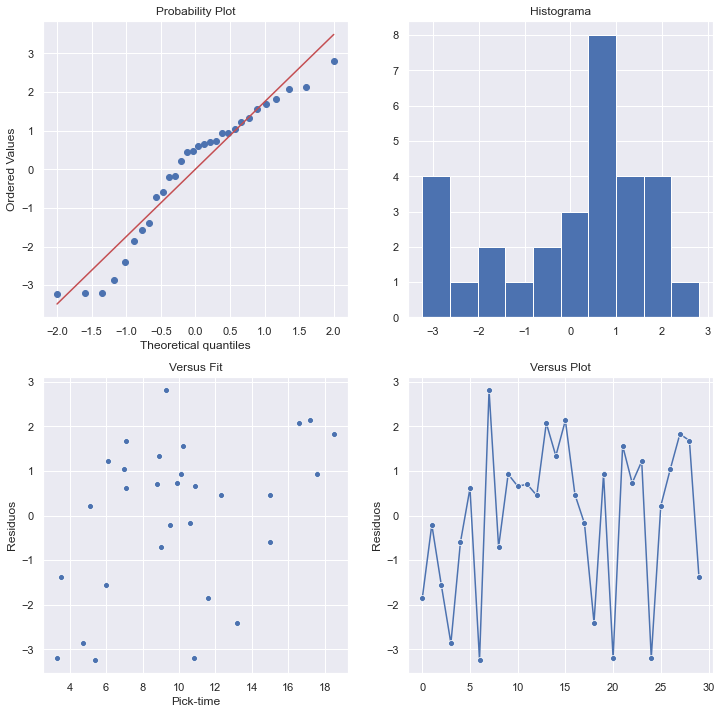

In [0]:
plt.figure(figsize=(12,12))
plt.subplot(2, 2, 1)
scipy.stats.probplot(df20['Residuos'], plot=plt)
plt.title('Probability Plot')
plt.subplot(2, 2, 2)
df20['Residuos'].hist()
plt.title('Histograma')
plt.subplot(2, 2, 3)
sns.scatterplot(df20['Pick-time'], df20['Residuos'])
plt.title('Versus Fit')
plt.subplot(2,2,4)
sns.lineplot(range(len(df20)),df20['Residuos'], marker='o')
plt.title('Versus Plot')

In [0]:
# Regressao com Intervalo de Confiança

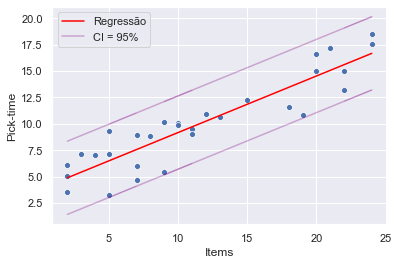

In [0]:
sns.scatterplot(df20['Items'],df20['Pick-time'])
sns.lineplot(df20['Items'],linreg.predict(df20['Items'].values.reshape(-1,1)).squeeze(), color='red', label = 'Regressão')

# CI = 95 -> + ou - 2 std
sns.lineplot(df20['Items'],linreg.predict(df20['Items'].values.reshape(-1,1)).squeeze()+(2*df20['Residuos'].std()), color='purple', alpha=0.3, label = 'CI = 95%')
sns.lineplot(df20['Items'],linreg.predict(df20['Items'].values.reshape(-1,1)).squeeze()-(2*df20['Residuos'].std()), color='purple', alpha=0.3)

In [0]:
# Para 25 items, teremos no máximo 21min (aproximadamente)!

In [0]:
# Contra-prova:
linreg.predict([[25]]) - 2*df20['Residuos'].std(), linreg.predict([[25]]) + 2*df20['Residuos'].std()

(array([[13.73834233]]), array([[20.67755224]]))

### Qui-Quadrado (X e Y Categóricos)

In [0]:
df21 = pd.read_excel('dataset.xlsx', sheet_name='Hospital', skiprows=7)
df21.head()

,Patient,Specialist,Department
0,1,P,A1
1,2,P,A1
2,3,Q,A1
3,4,R,A1
4,5,Q,A1


In [0]:
c_tab = pd.crosstab(index=df21['Specialist'], columns=df21['Department']).T
c_tab

Specialist,P,Q,R
Department,,,
A1,81,52,78
A4,17,15,26


In [0]:
# Importando chi2_contingency para retornar valor chi-square, p-valor, degress of freedom e frequencias esperadas
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(c_tab)
# Selecionando valor de significancia
alpha = 0.05
# Determinar quando rejeitar ou manter a hipotese nula
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Variaveis estão associadas (rejeita H0)')
else:
    print('Variaveis não estão associadas(falhou em rejeitar H0)')

significance=0.050, p=0.410
Variaveis não estão associadas(falhou em rejeitar H0)


In [0]:
expected

array([[76.86988848, 52.55390335, 81.57620818],
       [21.13011152, 14.44609665, 22.42379182]])

### Regressão Logística (X Numérico e Y Categórico)

In [0]:
### Logistic Regression ###

In [0]:
df22 = pd.read_excel('dataset.xlsx', sheet_name='Callcenter', skiprows=11, usecols=['HoldTime.1','HungUp.1'])
df22.head()

,HoldTime.1,HungUp.1
0,16,0
1,10,0
2,19,1
3,12,0
4,19,1


In [0]:
pg.logistic_regression(df22['HoldTime.1'],df22['HungUp.1'])

,names,coef,se,z,pval,CI[2.5%],CI[97.5%]
0,Intercept,-2.576496,0.322933,-7.978417,1.482217e-15,-3.209433,-1.943558
1,HoldTime.1,0.238108,0.026681,8.924165,4.490726e-19,0.185813,0.290402


In [0]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(df22['HoldTime.1'].values.reshape(-1,1),df22['HungUp.1'].values.reshape(-1,1))

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
df_proba = pd.DataFrame(logreg.predict_proba(df22['HoldTime.1'].values.reshape(-1,1)))
df_proba.columns = ['proba0', 'proba1']
df_proba.head()

,proba0,proba1
0,0.225763,0.774237
1,0.548655,0.451345
2,0.124968,0.875032
3,0.430297,0.569703
4,0.124968,0.875032


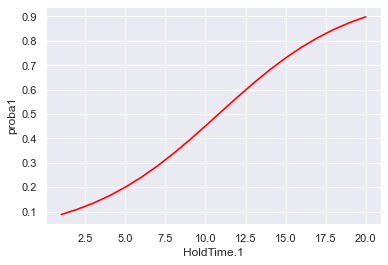

In [0]:
sns.lineplot(df22['HoldTime.1'], df_proba['proba1'], color='red')

In [0]:
ct_call = pd.crosstab(index=df22['HoldTime.1'],columns=df22['HungUp.1'])
ct_call.head()

HungUp.1,0,1
HoldTime.1,,
1,18,1
2,15,0
3,10,2
4,14,1
5,9,5


In [0]:
ct_call.columns = ['notHungUp','HungUp']

In [0]:
ct_call['Total'] = ct_call['notHungUp'] + ct_call['HungUp']

In [0]:
##### Exercicio - Printers

In [0]:
df23 = pd.read_excel('dataset.xlsx', sheet_name='Printers', skiprows=6)
df23.set_index('Printer', inplace=True)
df23

,Good,Dubious,Bad
Printer,,,
AX-4,10,13,17
AX-2,19,15,6


In [0]:
# Importando chi2_contingency para retornar valor chi-square, p-valor, degress of freedom e frequencias esperadas
from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(df23)
# Selecionando valor de significancia
alpha = 0.05
# Determinar quando rejeitar ou manter a hipotese nula
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Variaveis estão associadas (rejeita H0)')
else:
    print('Variaveis não estão associadas(falhou em rejeitar H0)')

significance=0.050, p=0.017
Variaveis estão associadas (rejeita H0)


In [0]:
# A impressora faz diferença dentro do comportamento 

In [0]:
print('Valores esperados: ') 
print(expected) 
print('====================')
print('Valores obtidos: ') 
print(df23.values)

Valores esperados: 
[[14.5 14.  11.5]
 [14.5 14.  11.5]]
Valores obtidos: 
[[10 13 17]
 [19 15  6]]


In [0]:
# Podemos perceber a diferença da segunda impressora que deveria ter algo perto de 11.5 ruins e obteve apenas 6!

In [0]:
df24 = pd.read_excel('dataset.xlsx', sheet_name='Student', skiprows=6)
df24.head()

,Student,Math grade,Pass?
0,1,7,No
1,2,7,Yes
2,3,*,No
3,4,8,No
4,5,8,Yes


In [0]:
df24['Math grade'] = pd.to_numeric(df24['Math grade'], errors='coerce')

In [0]:
df24_drop = df24.dropna().reset_index(drop=True)

In [0]:
df24_drop.head()

,Student,Math grade,Pass?
0,1,7.0,No
1,2,7.0,Yes
2,4,8.0,No
3,5,8.0,Yes
4,6,9.0,No


In [0]:
df24_drop['binPass?'] = (df24_drop['Pass?'] == 'Yes').astype(int)

In [0]:
df24_drop.head()

,Student,Math grade,Pass?,binPass?
0,1,7.0,No,0
1,2,7.0,Yes,1
2,4,8.0,No,0
3,5,8.0,Yes,1
4,6,9.0,No,0


In [0]:
pg.logistic_regression(df24_drop['Math grade'], df24_drop['binPass?'])

# H0 => Não há relação, p > 0.05
# H1 => Há relação, p < 0.05
# P-valor < 0.05, rejeitamos H0, existe relação entre as váriaveis 

,names,coef,se,z,pval,CI[2.5%],CI[97.5%]
0,Intercept,-11.627326,4.549032,-2.556000,0.010588,-20.543265,-2.711387
1,Math grade,1.423039,0.556475,2.557237,0.010551,0.332367,2.513710


In [0]:
logreg.fit(df24_drop['Math grade'].values.reshape(-1,1), df24_drop['binPass?'].values.reshape(-1,1))

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
df_proba = pd.DataFrame(logreg.predict_proba(df24_drop['Math grade'].values.reshape(-1,1)))
df24_drop['Proba'] = df_proba.iloc[:,1]
df24_drop

,Student,Math grade,Pass?,binPass?,Proba
0,1,7.0,No,0,0.206903
1,2,7.0,Yes,1,0.206903
2,4,8.0,No,0,0.447051
3,5,8.0,Yes,1,0.447051
4,6,9.0,No,0,0.714739
5,7,9.0,No,0,0.714739
6,8,5.0,No,0,0.026444
7,9,7.0,No,0,0.206903
8,10,9.0,Yes,1,0.714739
9,11,8.0,No,0,0.447051


In [0]:
df24_order = df24_drop.sort_values('Math grade').reset_index(drop=True)

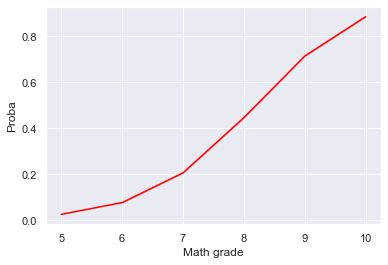

In [0]:
sns.lineplot(df24_order['Math grade'], df24_order['Proba'], color='red')